# EDA para projeto de machine learning de recuperação

### Instalando libs

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [7]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['diagnosis'] = df['target'].map({0: 'Maligno', 1: 'Benigno'})

print("Dimensões do Dataset:", df.shape)
print("\nDistribuição das Classes:")
print(df['diagnosis'].value_counts())

Dimensões do Dataset: (569, 32)

Distribuição das Classes:
diagnosis
Benigno    357
Maligno    212
Name: count, dtype: int64


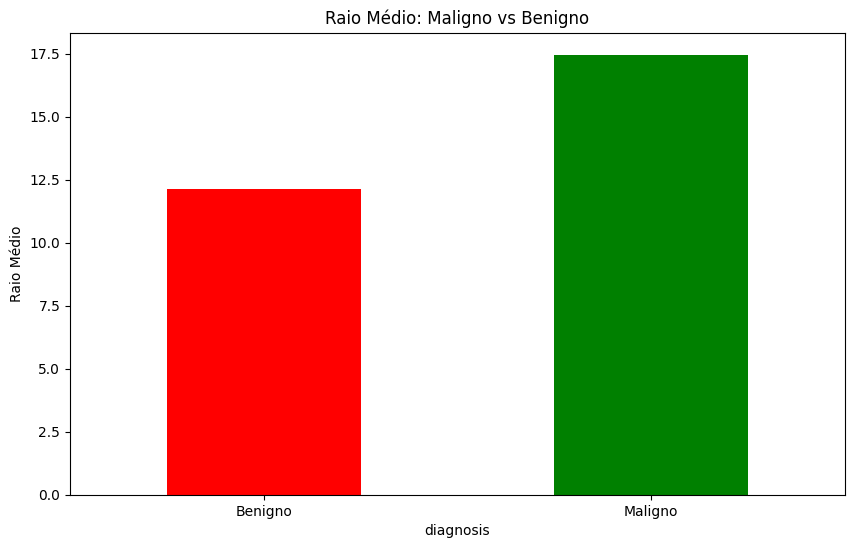

In [8]:
plt.figure(figsize=(10, 6))
features_analysis = df.groupby('diagnosis')['mean radius'].mean()
features_analysis.plot(kind='bar', color=['red', 'green'])
plt.title('Raio Médio: Maligno vs Benigno')
plt.ylabel('Raio Médio')
plt.xticks(rotation=0)
plt.show()

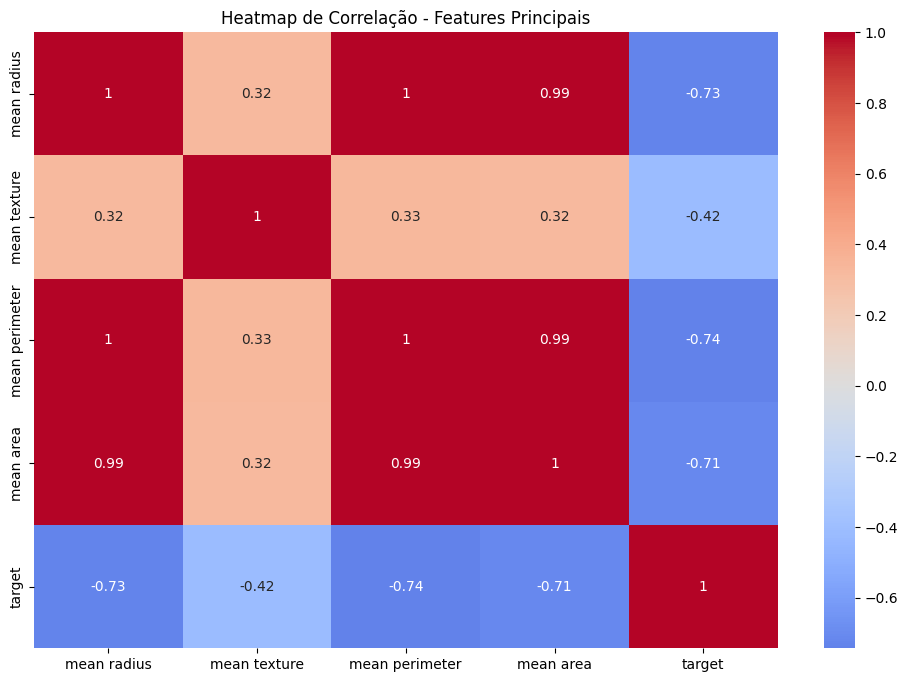

In [9]:
plt.figure(figsize=(12, 8))
correlation_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']
corr_matrix = df[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação - Features Principais')
plt.show()

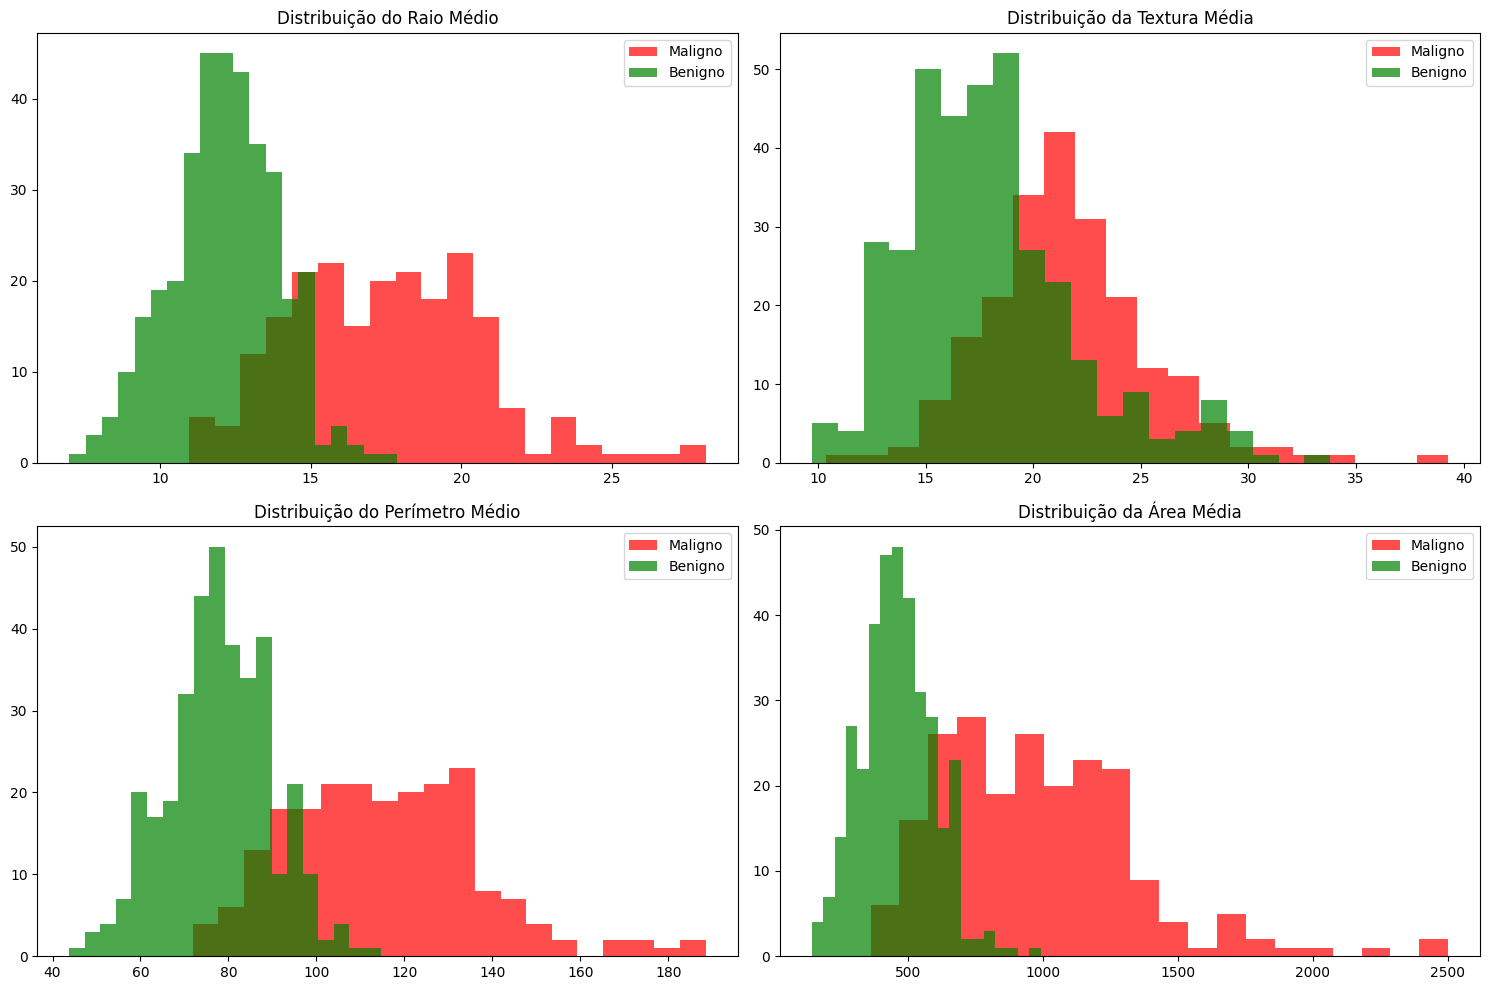

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Raio médio
axes[0,0].hist(df[df['diagnosis'] == 'Maligno']['mean radius'], 
               alpha=0.7, label='Maligno', color='red', bins=20)
axes[0,0].hist(df[df['diagnosis'] == 'Benigno']['mean radius'], 
               alpha=0.7, label='Benigno', color='green', bins=20)
axes[0,0].set_title('Distribuição do Raio Médio')
axes[0,0].legend()

# Textura média
axes[0,1].hist(df[df['diagnosis'] == 'Maligno']['mean texture'], 
               alpha=0.7, label='Maligno', color='red', bins=20)
axes[0,1].hist(df[df['diagnosis'] == 'Benigno']['mean texture'], 
               alpha=0.7, label='Benigno', color='green', bins=20)
axes[0,1].set_title('Distribuição da Textura Média')
axes[0,1].legend()

# Perímetro médio
axes[1,0].hist(df[df['diagnosis'] == 'Maligno']['mean perimeter'], 
               alpha=0.7, label='Maligno', color='red', bins=20)
axes[1,0].hist(df[df['diagnosis'] == 'Benigno']['mean perimeter'], 
               alpha=0.7, label='Benigno', color='green', bins=20)
axes[1,0].set_title('Distribuição do Perímetro Médio')
axes[1,0].legend()

# Área média
axes[1,1].hist(df[df['diagnosis'] == 'Maligno']['mean area'], 
               alpha=0.7, label='Maligno', color='red', bins=20)
axes[1,1].hist(df[df['diagnosis'] == 'Benigno']['mean area'], 
               alpha=0.7, label='Benigno', color='green', bins=20)
axes[1,1].set_title('Distribuição da Área Média')
axes[1,1].legend()

plt.tight_layout()
plt.show()